✅ TensorFlow version: 2.19.0
✅ Dataset loaded successfully!
   0   1        2        3        4        5        6        7        8   \
0   1   0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000   
1   1   0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
2   1   0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   
3   1   0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000   
4   1   0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152   

        9   ...       25       26       27       28       29       30  \
0  0.03760  ... -0.51171  0.41078 -0.46168  0.21266 -0.34090  0.42267   
1 -0.04549  ... -0.26569 -0.20468 -0.18401 -0.19040 -0.11593 -0.16626   
2  0.01198  ... -0.40220  0.58984 -0.22145  0.43100 -0.17365  0.60436   
3  0.00000  ...  0.90695  0.51613  1.00000  1.00000 -0.20099  0.25682   
4 -0.16399  ... -0.65158  0.13290 -0.53206  0.02431 -0.62197 -0.05707   

        31       32       33  34  
0 -0.5448

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353 (17.00 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4429 - loss: 0.8070 - val_accuracy: 0.8036 - val_loss: 0.5729
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7618 - loss: 0.5834 - val_accuracy: 0.8571 - val_loss: 0.4546
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8321 - loss: 0.4730 - val_accuracy: 0.8929 - val_loss: 0.3873
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8492 - loss: 0.4170 - val_accuracy: 0.8929 - val_loss: 0.3499
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8768 - loss: 0.3730 - val_accuracy: 0.8929 - val_loss: 0.3166
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8832 - loss: 0.2934 - val_accuracy: 0.8929 - val_loss: 0.2922
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9234 - loss: 0.2641 - val_accuracy: 0.9107 - val_loss: 0.2758
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9142 - loss: 0.2442 - val_accuracy: 0.8929 - val_loss

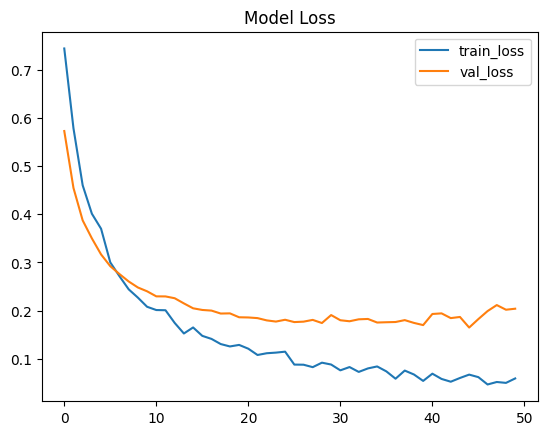

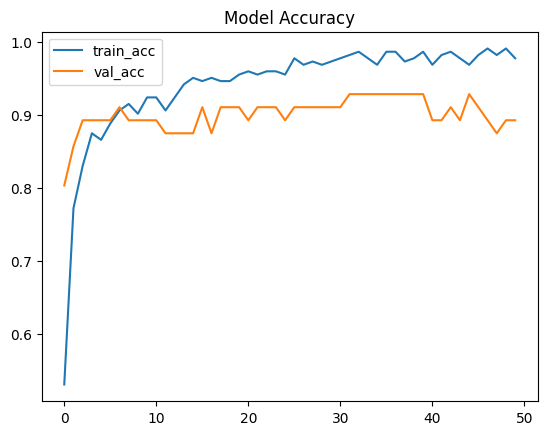

✅ Model saved as /content/osteoporosis_model.h5


In [ ]:
# =============================
# Install Required Libraries
# =============================
# !pip install -q tensorflow==2.12.0 matplotlib pandas scikit-learn

# =============================
# Import Libraries
# =============================
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

print("✅ TensorFlow version:", tf.__version__)

# =============================
# Load Dataset from Online URL
# =============================
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv"  # Sample dataset
filename = "osteoporosis_dataset.csv"

# Load the CSV file
df = pd.read_csv(url, header=None)
df.to_csv(filename, index=False)  # save a copy locally (optional)

print("✅ Dataset loaded successfully!")
print(df.head())

# =============================
# Data Preprocessing
# =============================

# Separate features (X) and labels (y)
X = df.iloc[:, :-1].values   # all columns except last
y = df.iloc[:, -1].values    # last column

# Convert labels (if strings) to numeric
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

# =============================
# Build a Simple Neural Network
# =============================
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary classification
])

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# =============================
# Train the Model
# =============================
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

# =============================
# Evaluate the Model
# =============================
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {acc*100:.2f}%")

# =============================
# Plot Training Curves
# =============================
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# =============================
# Save Model
# =============================
model.save("/content/osteoporosis_model.h5")
print("✅ Model saved as /content/osteoporosis_model.h5")


In [ ]:
!pip install -q --upgrade xgboost

In [ ]:
# ==========================================================
# 📦 Install required libraries (uncomment if needed)
# ==========================================================
# !pip install -q xgboost tensorflow scikit-learn joblib pandas

# ==========================================================
# 📚 Imports
# ==========================================================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import joblib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# ==========================================================
# ⚙️ Reproducibility
# ==========================================================
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# ==========================================================
# 🌐 Load Dataset from URL
# ==========================================================
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv"
df = pd.read_csv(url, header=None)
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()

# ==========================================================
# 🧹 Preprocessing
# ==========================================================
# Convert last column to numeric binary (g=1, b=0)
df.iloc[:, -1] = df.iloc[:, -1].map({'g': 1, 'b': 0})

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Train/Val/Test Split (60/20/20)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=SEED)
print("Shapes:", X_train.shape, X_val.shape, X_test.shape)

# Standardize features and convert to float32
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).astype(np.float32)
X_val = scaler.transform(X_val).astype(np.float32)
X_test = scaler.transform(X_test).astype(np.float32)

# Ensure target variables are float32 as well
y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)
y_test = y_test.astype(np.float32)

# ==========================================================
# 📊 Helper functions
# ==========================================================
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def evaluate_model(name, model, X_tr, y_tr, X_v, y_v):
    yv_pred = model.predict(X_v)
    yt_pred = model.predict(X_tr)
    metrics = {
        "train_rmse": rmse(y_tr, yt_pred),
        "val_rmse": rmse(y_v, yv_pred),
        "val_mae": mean_absolute_error(y_v, yv_pred),
        "val_r2": r2_score(y_v, yv_pred)
    }
    print(f"== {name} ==")
    print("Train RMSE: {:.3f} | Val RMSE: {:.3f} | Val R2: {:.3f}".format(
        metrics['train_rmse'], metrics['val_rmse'], metrics['val_r2']))
    return metrics

# ==========================================================
# 🧮 Linear Regression
# ==========================================================
lr = LinearRegression()
lr.fit(X_train, y_train)
metrics_lr = evaluate_model("LinearRegression", lr, X_train, y_train, X_val, y_val)

# ==========================================================
# 🌲 Random Forest
# ==========================================================
rf = RandomForestRegressor(n_estimators=200, random_state=SEED, n_jobs=-1)
rf.fit(X_train, y_train)
metrics_rf = evaluate_model("RandomForest", rf, X_train, y_train, X_val, y_val)

# ==========================================================
# ⚡ XGBoost using native API (fixed for XGBoost 3.0.5)
# ==========================================================
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'seed': SEED,
    'eval_metric': 'rmse'
}

evals = [(dtrain, 'train'), (dval, 'eval')]

xgb_model_native = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=200,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=False
)

# Evaluate native XGBoost on validation
y_val_pred = xgb_model_native.predict(dval)
y_train_pred = xgb_model_native.predict(dtrain)
print("== XGBoost (native API) ==")
print(f"Train RMSE: {rmse(y_train, y_train_pred):.3f} | Val RMSE: {rmse(y_val, y_val_pred):.3f} | Val R2: {r2_score(y_val, y_val_pred):.3f}")

metrics_xgb = {
    "train_rmse": rmse(y_train, y_train_pred),
    "val_rmse": rmse(y_val, y_val_pred),
    "val_mae": mean_absolute_error(y_val, y_val_pred),
    "val_r2": r2_score(y_val, y_val_pred)
}

# ==========================================================
# 🤖 Keras Feedforward Neural Network
# ==========================================================
def build_keras_model(input_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),  # Input layer defined here
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.BatchNormalization(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='linear')
    ])
    return model

keras_model = build_keras_model(X_train.shape[1])
keras_model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss='mse',
    metrics=[keras.metrics.RootMeanSquaredError(name='rmse')]
)

callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_rmse', patience=10, restore_best_weights=True, mode='min'),
    keras.callbacks.ReduceLROnPlateau(monitor='val_rmse', factor=0.5, patience=5, verbose=1, mode='min')
]

history = keras_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

metrics_keras = evaluate_model("Keras_FFNN", keras_model, X_train, y_train, X_val, y_val)

# ==========================================================
# 🏆 Compare and Save Best Model
# ==========================================================
results = {
    'LinearRegression': metrics_lr['val_rmse'],
    'RandomForest': metrics_rf['val_rmse'],
    'XGBoost': metrics_xgb['val_rmse'],
    'Keras_FFNN': metrics_keras['val_rmse']
}

for name, val_rmse in results.items():
    print(f"{name}: Val RMSE = {val_rmse:.3f}")

best_model_name = min(results, key=results.get)
print("\n✅ Best model:", best_model_name, "with RMSE =", results[best_model_name])

# ==========================================================
# 💾 Save and Evaluate Best Model on Test Set
# ==========================================================
if best_model_name == 'Keras_FFNN':
    keras_model.save('/content/best_model_keras.h5')
    print("💾 Saved: /content/best_model_keras.h5")
    y_test_pred = keras_model.predict(X_test).ravel()
elif best_model_name == 'RandomForest':
    joblib.dump(rf, '/content/best_model_randomforest.joblib')
    model = rf
    print("💾 Saved: /content/best_model_randomforest.joblib")
elif best_model_name == 'LinearRegression':
    joblib.dump(lr, '/content/best_model_linear.joblib')
    model = lr
    print("💾 Saved: /content/best_model_linear.joblib")
elif best_model_name == 'XGBoost':
    xgb_model_native.save_model('/content/best_model_xgb.json')
    model = xgb_model_native
    print("💾 Saved: /content/best_model_xgb.json")

if best_model_name != 'Keras_FFNN':
    y_test_pred = model.predict(xgb.DMatrix(X_test)) if best_model_name == 'XGBoost' else model.predict(X_test)

print("\n🧾 Test Results:")
print("Test RMSE:", rmse(y_test, y_test_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Test R2:", r2_score(y_test, y_test_pred))


✅ Dataset loaded successfully!
Shape: (351, 35)
Shapes: (210, 34) (70, 34) (71, 34)
== LinearRegression ==
Train RMSE: 0.281 | Val RMSE: 0.326 | Val R2: 0.538
== RandomForest ==
Train RMSE: 0.089 | Val RMSE: 0.288 | Val R2: 0.639
== XGBoost (native API) ==
Train RMSE: 0.004 | Val RMSE: 0.333 | Val R2: 0.518
Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 1.0833 - rmse: 1.0404 - val_loss: 0.3995 - val_rmse: 0.6321 - learning_rate: 0.0010
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5599 - rmse: 0.7473 - val_loss: 0.3069 - val_rmse: 0.5540 - learning_rate: 0.0010
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3934 - rmse: 0.6260 - val_loss: 0.3261 - val_rmse: 0.5710 - learning_rate: 0.0010
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2963 - rmse: 0.5443 - val_loss: 0.3691 - val_rmse: 0.6076 - learning_rate: 0.0010
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2905 - rmse: 0.5387 - val_loss: 0.3779 - val_rmse: 0.6147 - lea

== Keras_FFNN ==
Train RMSE: 0.184 | Val RMSE: 0.282 | Val R2: 0.654
LinearRegression: Val RMSE = 0.326
RandomForest: Val RMSE = 0.288
XGBoost: Val RMSE = 0.333
Keras_FFNN: Val RMSE = 0.282

✅ Best model: Keras_FFNN with RMSE = 0.2817489251782243
💾 Saved: /content/best_model_keras.h5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

🧾 Test Results:
Test RMSE: 0.25675024481374475
Test MAE: 0.21556101739406586
Test R2: 0.7239981889724731
